In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "C:/Users/yasht/OneDrive/Desktop/Stratascratch/Beer Data Analysis/BeerDataScienceProject.tar.bz2"

In [4]:
df = pd.read_csv(path, compression='bz2')

In [5]:
df.head(4)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145


In [6]:
df.shape

(528870, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [8]:
df[["review_appearance", "review_palette", "review_overall", "review_taste", "review_aroma"]].describe()


,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000
mean,3.864522,3.758926,3.833197,3.765993,3.817350
std,0.604010,0.685335,0.709962,0.669018,0.718903
min,0.000000,1.000000,0.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.500000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
df =  df[df["review_appearance"] > 0]
df = df[df['review_overall'] > 0]

In [10]:
df[["review_appearance", "review_palette", "review_overall", "review_taste", "review_aroma"]].describe()


,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,528867.000000,528867.000000,528867.000000,528867.000000,528867.000000
mean,3.864544,3.758930,3.833219,3.766001,3.817361
std,0.603942,0.685332,0.709905,0.669010,0.718892
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.500000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528867 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508587 non-null  float64
 1   beer_beerId         528867 non-null  int64  
 2   beer_brewerId       528867 non-null  int64  
 3   beer_name           528867 non-null  object 
 4   beer_style          528867 non-null  object 
 5   review_appearance   528867 non-null  float64
 6   review_palette      528867 non-null  float64
 7   review_overall      528867 non-null  float64
 8   review_taste        528867 non-null  float64
 9   review_profileName  528752 non-null  object 
 10  review_aroma        528867 non-null  float64
 11  review_text         528748 non-null  object 
 12  review_time         528867 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 56.5+ MB


In [12]:
df = df.dropna()

In [13]:
df.shape

(508355, 13)

In [14]:
df = df.sort_values(by = 'review_overall', ascending= False).drop_duplicates(subset=['review_profileName','beer_beerId'], keep= 'first')

In [15]:
df.shape

(503697, 13)

Rank the top 3 breweries which produce the strongest beers.


In [16]:
df_1 = df.groupby(by = ["beer_brewerId"])['beer_ABV'].mean().reset_index().sort_values(by='beer_ABV', ascending= False)

In [17]:
df_1['rank'] = df_1['beer_ABV'].rank(method='dense', ascending= False)

In [18]:
df_1a = df_1.query('rank < 4')

In [19]:
df_1a['beer_brewerId'] = str(df_1a['beer_brewerId'])

C:\Users\yasht\AppData\Local\Temp/ipykernel_13188/1341577293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1a['beer_brewerId'] = str(df_1a['beer_brewerId'])


In [20]:
df_1a.dtypes

col = df_1a['beer_brewerId']
row = df_1a['beer_ABV']

In [21]:
df_1[df_1['rank'] <= 3]

,beer_brewerId,beer_ABV,rank
699,6513,19.228824,1.0
165,736,13.750000,2.0
1466,24215,12.466667,3.0


In [22]:
df_1 = df_1[df_1['rank'] <=  3 ]

In [23]:
df_1['beer_brewerId'] = df_1['beer_brewerId'].astype(str)

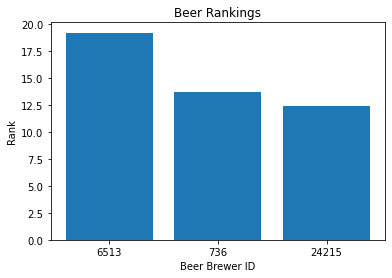

In [24]:
plt.bar(df_1['beer_brewerId'], df_1['beer_ABV'])
plt.xlabel('Beer Brewer ID')
plt.ylabel('Rank')
plt.title('Beer Rankings')
plt.show()


Which year did beers enjoy the highest ratings?


In [25]:
df_2 = df

In [26]:
df_2.head(2)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
152866,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.5,4.0,5.0,4.5,ken2cart1,4.0,22 oz bomber served in my 8 ounce flute glass ...,1243562965
370806,10.0,28385,22,Unibroue 15,Belgian Strong Pale Ale,4.0,4.0,5.0,4.5,Gehrig,4.5,I grabbed this at the terrific Neil St. Piccad...,1206337414


In [27]:
df_2['review_year'] = pd.to_datetime(df_2['review_time'], unit= 's').dt.year

In [28]:
review_year = df_2.groupby(by = 'review_year').size().to_frame('reviews_per_year').reset_index()

In [29]:
reviw_all = df_2.groupby(by = 'review_year')['review_overall'].mean().reset_index().sort_values(by = 'review_overall', ascending= False)

In [30]:
review_year = review_year.merge(right=reviw_all, how = 'inner', on = 'review_year')

In [31]:
review_year

,review_year,reviews_per_year,review_overall
0,1998,11,4.045455
1,1999,10,4.000000
2,2000,29,4.241379
3,2001,534,3.970037
4,2002,6725,3.822156
5,2003,16304,3.775025
6,2004,21038,3.806850
7,2005,27503,3.845799
8,2006,40366,3.809580
9,2007,44073,3.819697


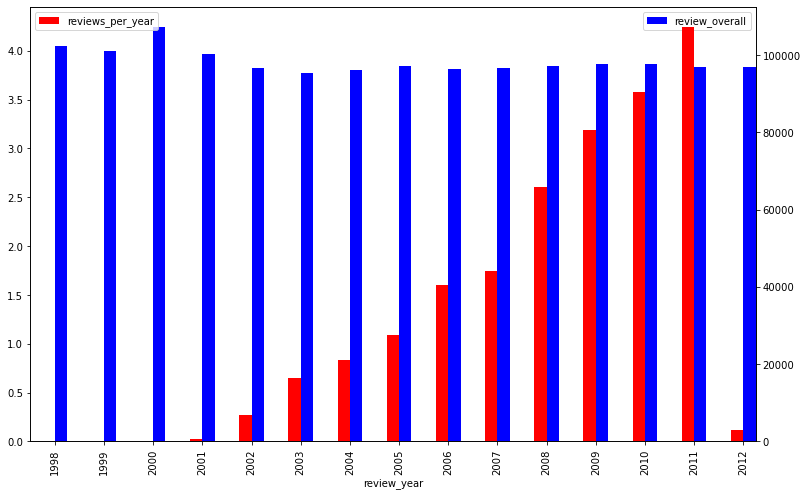

In [32]:
figure = plt.figure(figsize=(13,8))
ax1 = figure.add_subplot(111)
ax2 = ax1.twinx()
review_year.plot(x = "review_year", y = "review_overall",  kind= "bar", color = "blue", ax= ax1,  width = 0.25, position= 0)
review_year.plot(x = "review_year", y = "reviews_per_year",  kind= "bar", color = "red", ax= ax2, width = 0.25, position= 1)
plt.legend(loc="upper left")
plt.show()

Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?


In [33]:
df_3 = df

In [34]:
df_3.head(2)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
152866,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.5,4.0,5.0,4.5,ken2cart1,4.0,22 oz bomber served in my 8 ounce flute glass ...,1243562965,2009
370806,10.0,28385,22,Unibroue 15,Belgian Strong Pale Ale,4.0,4.0,5.0,4.5,Gehrig,4.5,I grabbed this at the terrific Neil St. Piccad...,1206337414,2008


In [35]:
df_3a = df_3.groupby(by = 'beer_beerId')[[
    "review_taste",
    "review_appearance",
    "review_palette",
    "review_aroma",
    "review_overall"
]].mean()

In [36]:
df_3a.corr()

,review_taste,review_appearance,review_palette,review_aroma,review_overall
review_taste,1.000000,0.682127,0.756303,0.835088,0.823181
review_appearance,0.682127,1.000000,0.669148,0.660223,0.637575
review_palette,0.756303,0.669148,1.000000,0.825980,0.766908
review_aroma,0.835088,0.660223,0.825980,1.000000,0.883871
review_overall,0.823181,0.637575,0.766908,0.883871,1.000000


In [37]:
from seaborn import heatmap


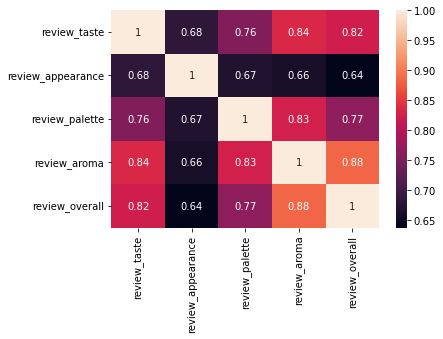

In [38]:
_ = heatmap(data=df_3a.corr(), annot=True)


If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?


In [39]:
df_4 = df

In [40]:
df_4.head(2)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
152866,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.5,4.0,5.0,4.5,ken2cart1,4.0,22 oz bomber served in my 8 ounce flute glass ...,1243562965,2009
370806,10.0,28385,22,Unibroue 15,Belgian Strong Pale Ale,4.0,4.0,5.0,4.5,Gehrig,4.5,I grabbed this at the terrific Neil St. Piccad...,1206337414,2008


In [41]:
df_4a = df_4.groupby(by = 'beer_beerId')['review_overall'].agg(['count', 'mean'])

df_4a = df_4a.rename(columns={
        'count' : 'num_review',
        'mean' : 'mean_overall_review'
})

In [42]:
df_4a.sort_values(by = 'mean_overall_review', ascending= False, inplace= True)

In [43]:
df_4a

,num_review,mean_overall_review
beer_beerId,,
67283,1,5.0
11895,1,5.0
13222,1,5.0
62145,1,5.0
38766,1,5.0
...,...,...
70123,1,1.0
75032,1,1.0
75030,1,1.0


In [44]:
df_4a.describe()

,num_review,mean_overall_review
count,14990.000000,14990.000000
mean,33.602201,3.651688
std,140.888150,0.625075
min,1.000000,1.000000
25%,1.000000,3.400000
50%,3.000000,3.750000
75%,10.000000,4.000000
max,2928.000000,5.000000


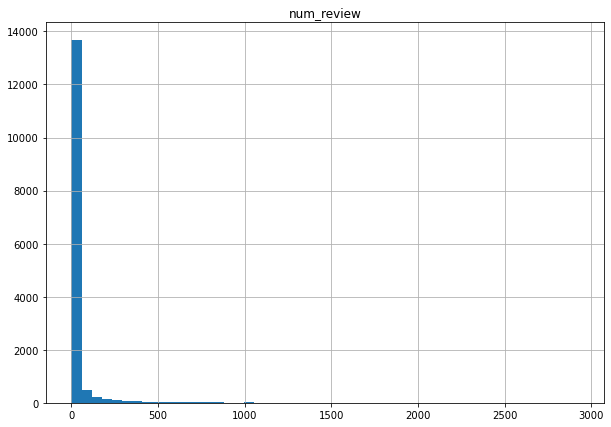

In [45]:
_ = df_4a.hist(column="num_review", bins=50, figsize=(10, 7))

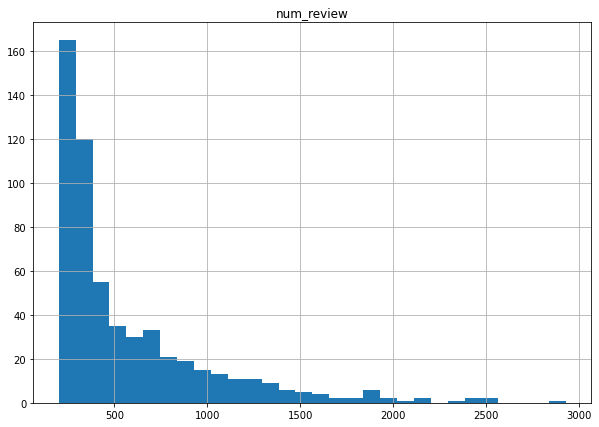

In [46]:
_ = df_4a[df_4a["num_review"] > 200].hist(column="num_review", bins=30, figsize=(10, 7))


In [47]:
df_4a[df_4a["num_review"] > 200].head()


,num_review,mean_overall_review
beer_beerId,,
56082,246,4.630081
16814,443,4.623025
47658,618,4.597087
6368,627,4.491228
2899,281,4.437722


In [48]:
df[(df["beer_beerId"] == 56082) | (df["beer_beerId"] == 47658) | (df["beer_beerId"] == 16814)].drop_duplicates(
    subset="beer_beerId")


,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
335037,8.0,56082,14064,Citra DIPA,American Double / Imperial IPA,4.5,5.0,5.0,5.0,OTB,5.0,I was fortunate to get two fresh bottles this ...,1322876922,2011
378616,8.0,16814,27039,Heady Topper,American Double / Imperial IPA,4.0,5.0,5.0,5.0,icepik,5.0,"A : Golden to amber color, large bubbles, some...",1325180700,2011
16698,10.6,47658,1199,Founders CBS Imperial Stout,American Double / Imperial Stout,4.5,4.5,5.0,5.0,treyrab,5.0,"After hearing so much about this beer, a sixte...",1245635836,2009
